In [1]:
#Calling the dependencies
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

In [2]:
X = np.array([[1,2], 
            [1.5, 1.8],
            [5,8],
            [8,8],
            [1, 0.6],
            [9,11]])

In [3]:
colors = ["g","r","c","b","k"]

In [4]:
#plt.scatter(X[:,0],X[:,1], s = 100)
#plt.show()

In [5]:
#Creating the K_means class
class K_means:
    def __init__(self, k = 2, tol = 0.01, max_iter = 300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    """The init method initiates the k value which is just k, the tolerance value <allow us to conclude optimization if 
    the centroid are no longer moving more than the tolerance value. The max_iter limits the number of iterations"""
    
    #The fit method
    
    def fit(self,data):
        
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        """the fit methods initiates an empty dictionary which will house the centroids. Then a for loop assigns the first 
        centroids as the first k data samples. Shuffle the data to ensure that the assigned centroids are truly random"""
    
        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []
                """here we iterate through the max_iter value while initializing the classifications as a dictionary
                , we create empty k classifications  """
            
            for featureset in data:
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                """we iterate throught the features, calculate distances of the features to the current centroids
                and classify them"""
            
            prev_centroids = dict(self.centroids)
        
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis = 0)
            
                """We now have the new centroids and knowledge of the previous centroids, we now add 
                the optimization function to know if we are optimized yet"""
            
            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                
                if np.sum((current_centroid - original_centroid)/ original_centroid*100) > self.tol:
                    print(np.sum((current_centroid - original_centroid)/ original_centroid*100))
                    optimized = False
                    
                    
            if optimized:
                break
    
    def predict(self,data):
        distances =[np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
                

453.3333333333334
102.72108843537411


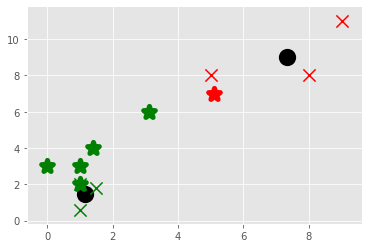

In [6]:
clf = K_means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
               marker = "o", color = "k", s =150, linewidths = 5)
    
for classification in clf.classifications:
    color = colors[classification]
    
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker = "x", color = color, s = 150, linewidths = 5)


#predicting using the algorithm
tests = np.array([[1,3],
               [1.4,4],
               [0,3],
               [3.1,6],
               [5.1,7],
               [1,2]])

for test in tests:
    classification = clf.predict(test)
    plt.scatter(test[0],test[1],marker = "*", color = colors[classification], s = 150, linewidths = 5)
    
plt.show()

In [8]:
print(clf.centroids)

{0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}
